# Importing required Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\\batchs\\2023\\cvs .file\\Bank_details.csv")

In [4]:
#It give the first five elements
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#It gives the last five elements
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
#It gives the information of colums
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Introduction :-



1. age -  age:age - (numeric)
2.job :job - type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-
3.marital :marital - marital status (categorical: "divorced","married","single","unknow")
4.education:education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5.default:default- has credit in default? (categorical: "no","yes","unknown")
6.housing: housing-has housing loan? (categorical: "no","yes","unknown")
7.loan:loan- has personal loan? (categorical: "no","yes","unknown")
8.contact:contact- contact communication type (categorical: "cellular","telephone")
9.month:month-last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10.day_of_week:day_of_week- last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11.duration:duration- last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target
12.campaign:campaign-number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.pdays:pdays-number of days that passed by after the client was last contacted from a previous campaign.
14.previous:previous- number of contacts performed before this campaign and for this client (numeric)
15.poutcome:poutcome- outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
16.emp.var.rate:emp.var.rate- employment variation rate - quarterly indicator (numeric)
17.cons.price.idx:cons.price.idx- consumer price index - monthly indicator (numeric)
18.cons.conf.idx:cons.conf.idx- consumer confidence index - monthly indicator (numeric)
19.euribor3m:euribor3m- euribor 320 - nr.employed: number of employees - quarterly indicator (numeric)
20.nr.employed: nr.employed-number of employees - quarterly indicator (numeric)
output = 
 y - has the client subscribed a term deposit? (binary: "yes","no")


In [7]:
#this check the size of row and column
df.shape

(41188, 21)

In [8]:
#It gives inforamtion about min,max,std in dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [9]:
#It check the null value
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
#It gives the unique characters from dataset
for i in df:
    print(i,":",df[i].unique())

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
duration : [ 261  149  226 ... 1246 1556 1868]
campaign : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

# Data Cleaning and Preprocessing

In [11]:
#It replace the unknow with no
df.replace("unknown",'no', inplace = True)

In [12]:
for i in df:
    print(i,":",df[i].unique())

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'no' 'entrepreneur' 'student']
marital : ['married' 'single' 'divorced' 'no']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' 'no'
 'university.degree' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
duration : [ 261  149  226 ... 1246 1556 1868]
campaign : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays : [999   6   4   3   5   1

In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Visualisation

In [14]:
import matplotlib.pyplot as plt

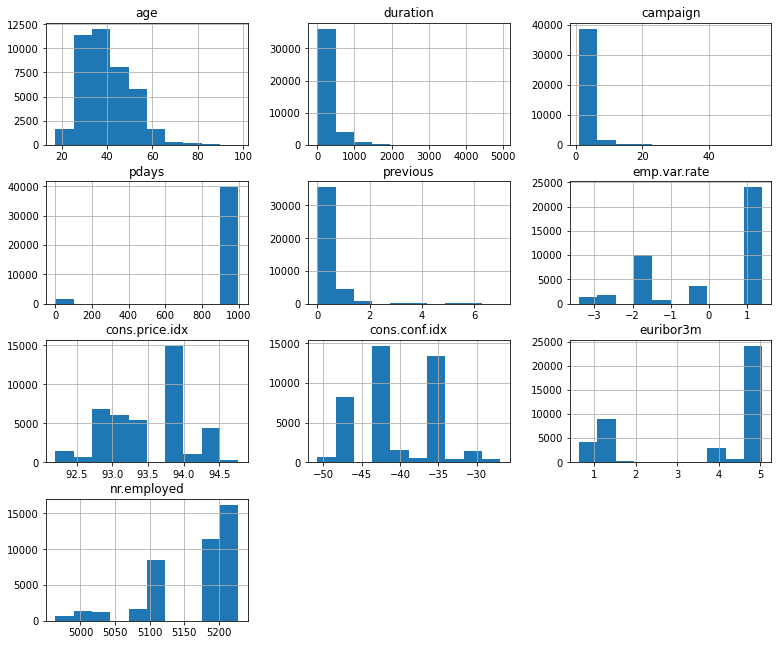

In [15]:
df.hist(figsize=(13, 11))
plt.show()



In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
label_encoders

{'job': LabelEncoder(),
 'marital': LabelEncoder(),
 'education': LabelEncoder(),
 'default': LabelEncoder(),
 'housing': LabelEncoder(),
 'loan': LabelEncoder(),
 'contact': LabelEncoder(),
 'month': LabelEncoder(),
 'day_of_week': LabelEncoder(),
 'poutcome': LabelEncoder(),
 'y': LabelEncoder()}

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('y', axis=1)

In [22]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,8,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,8,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,8,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,6,0,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,6,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,6,1,7,0,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,10,1,6,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [23]:
y = df.y

In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [25]:
#her we split the data into training and testing sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [26]:
X_train.shape

(32950, 20)

In [27]:
X_test.shape

(8238, 20)

In [28]:
y_train.shape

(32950,)

In [29]:
y_test.shape

(8238,)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
#Train the model on the training 
lr.fit(X_train,y_train)

LogisticRegression()

In [33]:
#Evaluate the model accuracy train data
accuracy = lr.score(X_test, y_test)

In [34]:
accuracy 

0.9101723719349356

In [35]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [36]:
accuracy_score(y_test,y_pred)

0.9101723719349356

In [37]:
from sklearn.metrics import classification_report

In [38]:
cr=(classification_report(y_test,y_pred))


In [39]:
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



# Random forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [42]:
rf.fit(X_train, y_train)


RandomForestClassifier()

In [43]:
accuracy = rf.score(X_test, y_test)
accuracy

0.9150279193979121

In [44]:
from sklearn.metrics import classification_report


In [45]:
y_pred1 = rf.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 1, 0])

In [46]:
accuracy_score(y_test,y_pred1)

0.9150279193979121

In [47]:
cr=(classification_report(y_test,y_pred1))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.66      0.53      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



# using Hyper tuning parameter With the RandomForestClssifier


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators=200,criterion='gini')
rf

RandomForestClassifier(n_estimators=200)

In [50]:
#Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [51]:
# Evaluate the model's accuracy on the test data
accuracy = rf.score(X_test, y_test)
accuracy

0.9142995872784656

In [52]:
y_pred2=rf.predict(X_test)
y_pred2


array([0, 0, 0, ..., 0, 1, 0])

In [53]:
accuracy_score(y_test,y_pred2)

0.9142995872784656

In [54]:
cr=(classification_report(y_test,y_pred2))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.53      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



# Adaboost


In [55]:
from sklearn.ensemble import AdaBoostClassifier


In [56]:
ada = AdaBoostClassifier()


In [57]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [58]:
y_pred3= ada.predict(X_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
accuracy_score(y_test, y_pred3)

0.9077445982034474

In [60]:
cr=(classification_report(y_test,y_pred3))
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.39      0.49       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



# using Hyper tuning parameter With the Adaboost


In [61]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ada

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [62]:
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [63]:
y_pred4 = ada.predict(X_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
accuracy_score(y_test, y_pred4)

0.906409322651129

In [65]:
cr=(classification_report(y_test,y_pred4))
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.69      0.32      0.44       935

    accuracy                           0.91      8238
   macro avg       0.80      0.65      0.69      8238
weighted avg       0.89      0.91      0.89      8238



# GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
xg = GradientBoostingClassifier()
xg

GradientBoostingClassifier()

In [68]:
xg.fit(X_train, y_train)

GradientBoostingClassifier()

In [69]:
#accuracy on the test data
accuracy = xg.score(X_test, y_test)
accuracy

0.9196406894877397

In [70]:
y_pred5=xg.predict(X_test)
y_pred5

array([0, 0, 0, ..., 0, 1, 0])

In [71]:
accuracy_score(y_test,y_pred5)

0.9196406894877397

In [72]:
cr=(classification_report(y_test,y_pred5))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7303
           1       0.69      0.52      0.60       935

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.91      0.92      0.91      8238



# using Hyper tuning parameter With the Gradient Boost classifier


In [73]:
#Changed "colsample_bytree" to "max_features"
xg = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=3,subsample=0.8,max_features=0.8)

In [74]:
xg

GradientBoostingClassifier(max_features=0.8, subsample=0.8)

In [75]:
xg.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, subsample=0.8)

In [76]:
#Predict the labels for the test set
y_pred6= xg.predict(X_test)
y_pred6

array([0, 0, 0, ..., 0, 1, 0])

In [77]:
#Calculate the accuracy score
accuracy_score(y_test, y_pred6)

0.9204904102937607

In [78]:
cr=(classification_report(y_test,y_pred6))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7303
           1       0.69      0.54      0.61       935

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.91      0.92      0.92      8238



# DecisionTreeClassifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
#the Decision Tree classifier
model = DecisionTreeClassifier()

In [81]:
#Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred7 = model.predict(X_test)
y_pred7

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
#Calculate the accuracy score
accuracy_score(y_test, y_pred7)

0.890507404709881

In [90]:
cr=(classification_report(y_test,y_pred7))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.52      0.53      0.52       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



# SVC

In [91]:
from sklearn.svm import SVC

In [92]:
df = SVC()
df.fit(X_train,y_train)
df.score(X_test,y_test)

0.8945132313668366

In [93]:
y_pred8=df.predict(X_test)
y_pred8

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
accuracy_score(y_test,y_pred8)

0.8945132313668366

# SVC using hyper tunning parameter

In [95]:
svc = SVC(kernel='poly')
svc

SVC(kernel='poly')

In [96]:
svc.fit(X_train, y_train)

SVC(kernel='poly')

In [97]:
y_pred9 = svc.predict(X_test)
y_pred9 

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
accuracy_score(y_test,y_pred9)

0.8945132313668366

In [99]:
cr=(classification_report(y_test,y_pred9))
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.60      0.21      0.31       935

    accuracy                           0.89      8238
   macro avg       0.75      0.59      0.63      8238
weighted avg       0.87      0.89      0.87      8238



In [100]:
#check final accurancy
final_acc= pd.DataFrame({'Models':['log_r','Randomforest','Randomforest_para','Adaboost','Adaboost_para','GradientBoost','GradientBoost_param','DescisionTreeClassifier','svc','svc_pr'],
                       'ACC':[accuracy_score(y_test,y_pred),
                              accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6),
                              accuracy_score(y_test,y_pred7),
                              accuracy_score(y_test,y_pred8),
                              accuracy_score(y_test,y_pred9),
                              
    
]})

                              

In [101]:
final_acc

,Models,ACC
0,log_r,0.910172
1,Randomforest,0.915028
2,Randomforest_para,0.914300
3,Adaboost,0.907745
4,Adaboost_para,0.906409
5,GradientBoost,0.919641
6,GradientBoost_param,0.920490
7,DescisionTreeClassifier,0.890507
8,svc,0.894513
9,svc_pr,0.894513


In [102]:
import seaborn as sns

In [103]:
import matplotlib.pyplot as plt

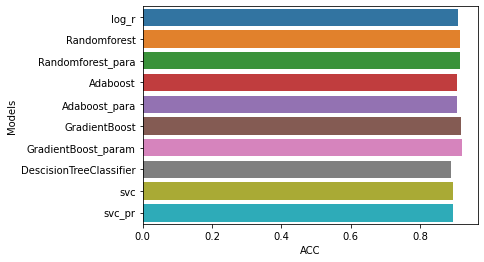

In [104]:
sns.barplot( x='ACC',y='Models', data=final_acc, orient='h')
plt.show()